In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize


plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

In [2]:
x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) # Random data from [-2,2]
b = 0.9*x + 0.1*np.random.randn(len(x),1)  # Line y = 0.9x with noise
atrue = np.linalg.lstsq(x,b,rcond=None)[0] # Least-squares slope (no outliers)
atrue = atrue.item(0)

b[-1] = -5.5  # Introduce outlier
acorrupt = np.linalg.lstsq(x,b,rcond=None)[0] # New slope
acorrupt = acorrupt.item(0)

In [3]:
## L1 optimization to reject outlier
def L1_norm(a):
    return np.linalg.norm(a*x-b,ord=1)

a0 = acorrupt   # initialize to L2 solution
res = minimize(L1_norm, a0)
aL1 = res.x[0]  # aL1 is robust

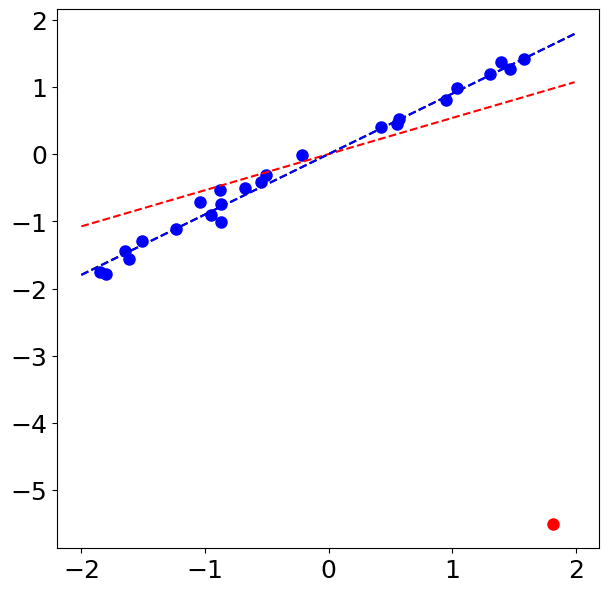

In [7]:
plt.plot(x[:-1],b[:-1],'o',color='b',ms=8) # Data
plt.plot(x[-1],b[-1],'o',color='r',ms=8)   # Outlier

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid,'--',color='k')    # L2 fit (no outlier)
plt.plot(xgrid,acorrupt*xgrid,'--',color='r') # L2 fit (outlier)
plt.plot(xgrid,aL1*xgrid,'--',color='b')      # L1 fit

plt.show()